In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./data/preprocessed/lin_reg_preproccessed.csv',)

# Assuming df is your DataFrame and 'consumption' is the target variable
X = df.drop('consumption', axis=1)
y = df['consumption']

kf = KFold(n_splits=2)  # Define the split - into 5 folds 
kf.get_n_splits(X)  # returns the number of splitting iterations in the cross-validator

scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    score = mean_squared_error(y_test, predictions)
    scores.append(score)

average_score = np.mean(scores)
for i in range(len(scores)):
    print(f'Fold {i+1} MSE: {scores[i]}')
print(f'Average MSE: {average_score}')

Fold 1 MSE: 0.004996434747587932
Fold 2 MSE: 0.024821488286934246
Average MSE: 0.01490896151726109


In [20]:
from sklearn.linear_model import  Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# ...

scaler = StandardScaler()


df = pd.read_csv('./data/preprocessed/lin_reg_preproccessed.csv',)

X = df.drop('consumption', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['consumption']

kf = KFold(n_splits=2)

lasso_scores = []
ridge_scores = []
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)
    lasso_predictions = lasso_model.predict(X_test)
    lasso_score = mean_squared_error(y_test, lasso_predictions)
    lasso_scores.append(lasso_score)

    ridge_model = Ridge()
    ridge_model.fit(X_train, y_train)
    ridge_predictions = ridge_model.predict(X_test)
    ridge_score = mean_squared_error(y_test, ridge_predictions)
    ridge_scores.append(ridge_score)

average_lasso_score = np.mean(lasso_scores)
average_ridge_score = np.mean(ridge_scores)

for i in range(len(lasso_scores)):
    print(f'Fold {i+1} Lasso MSE: {lasso_scores[i]}')
print(f'Average Lasso MSE: {average_lasso_score}')

for i in range(len(ridge_scores)):
    print(f'Fold {i+1} Ridge MSE: {ridge_scores[i]}')
print(f'Average Ridge MSE: {average_ridge_score}')

Fold 1 Lasso MSE: 0.9920027086474367
Fold 2 Lasso MSE: 22.77999218123706
Average Lasso MSE: 11.885997444942248
Fold 1 Ridge MSE: 0.005029600648561539
Fold 2 Ridge MSE: 0.025018938168569413
Average Ridge MSE: 0.015024269408565476


In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

# ...

random_forest_scores = []
gradient_boosting_scores = []
bagging_scores = []
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # ...

    random_forest_model = RandomForestRegressor()
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_score = mean_squared_error(y_test, random_forest_predictions)
    random_forest_scores.append(random_forest_score)

    gradient_boosting_model = GradientBoostingRegressor()
    gradient_boosting_model.fit(X_train, y_train)
    gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
    gradient_boosting_score = mean_squared_error(y_test, gradient_boosting_predictions)
    gradient_boosting_scores.append(gradient_boosting_score)

    bagging_model = BaggingRegressor()
    bagging_model.fit(X_train, y_train)
    bagging_predictions = bagging_model.predict(X_test)
    bagging_score = mean_squared_error(y_test, bagging_predictions)
    bagging_scores.append(bagging_score)

average_bagging_score = np.mean(bagging_scores)

for i in range(len(bagging_scores)):
    print(f'Fold {i+1} Bagging MSE: {bagging_scores[i]}')
print(f'Average Bagging MSE: {average_bagging_score}')

average_random_forest_score = np.mean(random_forest_scores)
average_gradient_boosting_score = np.mean(gradient_boosting_scores)

for i in range(len(random_forest_scores)):
    print(f'Fold {i+1} Random Forest MSE: {random_forest_scores[i]}')
print(f'Average Random Forest MSE: {average_random_forest_score}')

for i in range(len(gradient_boosting_scores)):
    print(f'Fold {i+1} Gradient Boosting MSE: {gradient_boosting_scores[i]}')
print(f'Average Gradient Boosting MSE: {average_gradient_boosting_score}')

Fold 1 Bagging MSE: 0.04578232166116122
Fold 2 Bagging MSE: 4.140851961598522
Average Bagging MSE: 2.0933171416298415
Fold 1 Random Forest MSE: 0.04389352739285295
Fold 2 Random Forest MSE: 4.263684796774629
Average Random Forest MSE: 2.153789162083741
Fold 1 Gradient Boosting MSE: 0.08994677786119815
Fold 2 Gradient Boosting MSE: 4.075670412120499
Average Gradient Boosting MSE: 2.0828085949908486


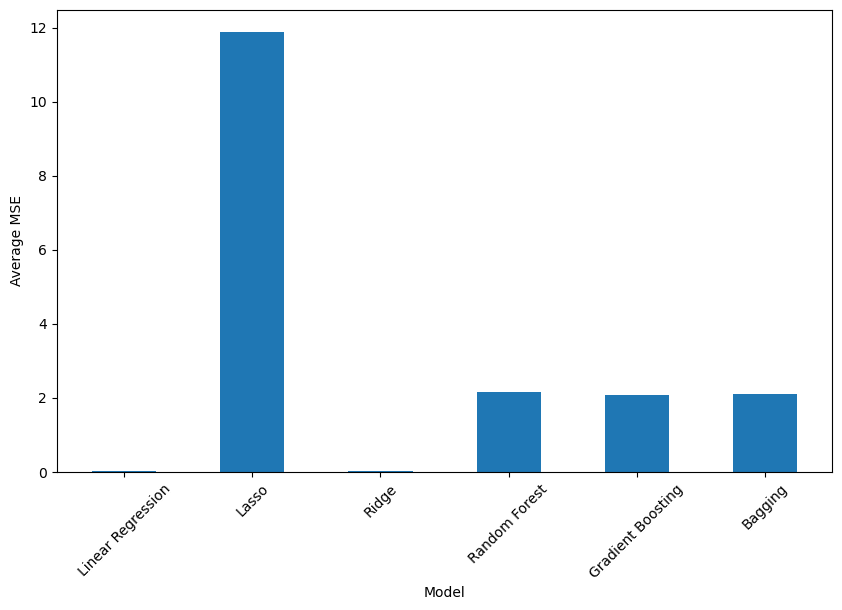

In [26]:
import matplotlib.pyplot as plt

# ...

# After calculating the scores

# Create a list of all scores for each model
all_scores = [scores, lasso_scores, ridge_scores, random_forest_scores, gradient_boosting_scores, bagging_scores]

# Create a list of model names
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Random Forest', 'Gradient Boosting', 'Bagging']

# Calculate average scores for each model
average_scores = [np.mean(scores) for scores in all_scores]

# Plot average scores
plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
barlist = plt.bar(model_names, average_scores, width=0.5)
plt.xlabel('Model')
plt.ylabel('Average MSE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [33]:
models = [LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(), GradientBoostingRegressor(), BaggingRegressor()]

from collections import defaultdict

# Initialize a dictionary to store the MSE for each model and fold
mse_scores = defaultdict(lambda: defaultdict(list))

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in zip(model_names, models):
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        train_mse = mean_squared_error(y_train, train_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        mse_scores[model_name]['Train'].append(train_mse)
        mse_scores[model_name]['Test'].append(test_mse)

average_train_mse = [np.mean(mse_scores[model_name]['Train']) for model_name in model_names]
average_test_mse = [np.mean(mse_scores[model_name]['Test']) for model_name in model_names]


# Create a DataFrame to store the average training and testing MSE for each model
from IPython.display import display

# Create a DataFrame to store the average training and testing MSE for each model
mse_df = pd.DataFrame({
    'Model': model_names,
    'Average Train MSE': average_train_mse,
    'Average Test MSE': average_test_mse
})

# Display the DataFrame
display(mse_df)


,Model,Average Train MSE,Average Test MSE
0,Linear Regression,0.013557,0.014909
1,Lasso,1.465819,11.885997
2,Ridge,0.013559,0.015024
3,Random Forest,0.000865,2.141690
4,Gradient Boosting,0.006302,2.082808
5,Bagging,0.001252,2.158570


In [36]:
import itertools
from statsmodels.tsa.arima.model import ARIMA


# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Find the best parameters
best_aic = np.inf
best_pdq = None
for param in pdq:
    try:
        model = ARIMA(y_train, order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq}')

/home/thomashasvold/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA parameters: (1, 1, 1)


In [62]:
from statsmodels.tsa.arima.model import ARIMA

# Assume y is your time series data
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

p, d, q = best_pdq
best_pdq = (p, 0, q)

# The order parameter specifies the order of the AR, I, and MA parts of the model
model = ARIMA(y_train, order=best_pdq)
model_fit = model.fit(method="innovations_mle")

# Make predictions
train_predictions = model_fit.predict(start=0, end=len(y_train)-1)
test_predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Calculate MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'ARIMA Train MSE: {train_mse}, Test MSE: {test_mse}')

ARIMA Train MSE: 1.9407592879240083, Test MSE: 22.779932269966114


In [63]:
#Define the initial training period
initial_train_period = 100
horizon = 1

# Loop over the rest of the data
for i in range(initial_train_period, len(y)):
    # Define the training and test data
    train = y[:i]
    test = y[i:i+horizon]

    # Fit the ARIMA model
    model = ARIMA(train, order=best_pdq)
    model_fit = model.fit("innovations_mle")

    # Make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+horizon-1)

    # Calculate and store the MSE
    mse = mean_squared_error(test, predictions)

    print(mse)

/home/thomashasvold/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/thomashasvold/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/thomashasvold/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/thomashasvold/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
